# Домашнее задание 1, задача 1

В этом задании мы рассмотрим граф товаров, часто покупаемых вместе, и попробуем выделить группы взаимосвязанных ключевых товаров, которые покупают со многими другими товарами той же группы. Для этого мы хотим последовательно удалять из графа вершины степени не больше 5 до тех пор, пока такие вершины остаются. После этого компоненты связности получившегося графа как раз и будем считать такими группами ключевых продуктов. 

В результате работы программа должна построить описанный выше граф и напечатать количество компонент связности в нем.


---
**Правила сдачи.** Это первая из двух задач первого домашнего задания. Каждая задача оценивается в 5 баллов.

Дедлайн первого домашнего задания — 25 мая в 19:00. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 26 мая. 

Также можно отправить решения до 19:00 23 мая. Тогда они будут проверены до 19:00 24 мая и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---



In [1]:
# Задаем граф

import networkx as nx
import matplotlib.pyplot as plt


# Считываем данные из файла и заводим граф G_am
G_am = nx.read_edgelist("amazon0302.txt", create_using=nx.Graph(), nodetype=int, data=False)

# Перенумеровываем вершины
G_am = nx.convert_node_labels_to_integers(G_am, ordering='decreasing degree')

# Печатаем число вершин в G_am
nodes = G_am.number_of_nodes()
print("Число вершин: ", nodes)

# Печатаем число ребер в G_am
edges = G_am.number_of_edges()
print("Число ребер: ", edges)

# Печатаем число компонент связности в G_am
print("Число компонент связности: ", nx.number_connected_components(G_am))

Число вершин:  262111
Число ребер:  899792
Число компонент связности:  1


In [2]:
def cutoff_by_degree(G, degree_threshold = 5):
    # Добавьте сюда ваше решение. 
    # Результатом работы функции должен быть граф, получающийся из изначального графа последовательным удалением вершин степени не больше 5
    while [vertex for vertex, degree in G.degree() if degree <= degree_threshold] != []:          
        curr_vertex = [vertex for vertex, degree in G.degree() if degree <= degree_threshold]
        for i in curr_vertex:
            G.remove_node(i)
    return G

In [3]:
# Создаем копию графа, чтобы не портить основной
G = G_am.copy()
cutoff_by_degree(G)


# Печатаем число вершин в G
nodes = G.number_of_nodes()
print("Число вершин: ", nodes)

# Печатаем число ребер в G
edges = G.number_of_edges()
print("Число ребер: ", edges)

# Печатаем число компонент связности в G
print("Число компонент связности: ", nx.number_connected_components(G))

Число вершин:  286
Число ребер:  950
Число компонент связности:  32


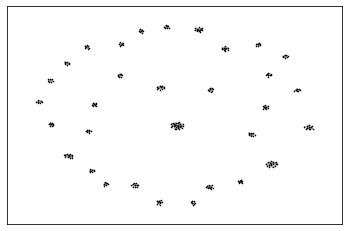

In [4]:
# В этом блоке можно посмотреть на результат

def draw_G(G):
    options = {
        "node_size": 2,
        "node_color": "black",
        "edgecolors": "black",
        "linewidths": 0.1,
        "width": 0.1,
    }

    nx.draw_networkx(G, with_labels=False, **options)
    plt.show()


draw_G(G)